### General Instructions: 
- Due Date: Monday Feb 12, 5 PM 
- Submission: Please work on this Notebook and leave it in your account on the server. We have a crontab job which will copy your submission Notebook from your account at sharp 5 PM on Monday, Feb 12. Any changes made to Notebook after 5 PM, Monday, Feb 12 will not be reflected in the submitted assignment. DO NOT change the name or location of this file on the server.
- __Plagiarism will not be tolerated in any form. Zero points will be awarded for the entire assignment in such cases__.

# Grade 75.0 / 85.0

In [3]:
import os
import numpy as np
import ase
import ase.io
import ase.build
import ase.visualize
import matplotlib.pyplot as plt

## Q1) Grade 30.0 / 30.0

In [57]:
# Answer 1:

import mywrapper

epsilon = 1.67e-21
sigma = 3.4e-10
cutoff = 3.5*sigma

energy = mywrapper.LJ.get_LJEnergy(5.0e-10, epsilon, sigma, cutoff)
print(energy)

-1.2612907560695753e-20


In [58]:
lattice_vector = np.linspace(5.1,5.4,50)

# to convert into meter
lattice_vector = (10**(-10))*lattice_vector

energies = []

for i in lattice_vector:
    energies.append(mywrapper.LJ.get_LJEnergy(i, epsilon, sigma, cutoff))

print("lattice_vector in Angstrome    ","    energy in ev" )

for i in range(50):
    print("%.4f                         |          %.5f" %(lattice_vector[i]*(10**(10)), energies[i]*(6.2415e+18)))

lattice_vector in Angstrome         energy in ev
5.1000                         |          -0.08564
5.1061                         |          -0.08592
5.1122                         |          -0.08618
5.1184                         |          -0.08642
5.1245                         |          -0.08665
5.1306                         |          -0.08687
5.1367                         |          -0.08707
5.1429                         |          -0.08726
5.1490                         |          -0.08744
5.1551                         |          -0.08760
5.1612                         |          -0.08775
5.1673                         |          -0.08789
5.1735                         |          -0.08802
5.1796                         |          -0.08813
5.1857                         |          -0.08824
5.1918                         |          -0.08833
5.1980                         |          -0.08841
5.2041                         |          -0.08848
5.2102                         | 

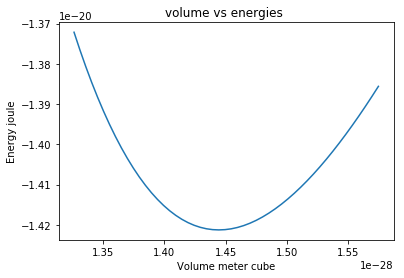

In [59]:
volume = []
for i in lattice_vector:
    volume.append(i**3) # m cube
plt.plot(volume,energies)

plt.xlabel('Volume meter cube')
plt.title('volume vs energies ')
plt.ylabel('Energy joule')
plt.show()

polynomial 
             3             2
-5.648e+64 x + 2.731e+37 x - 4.355e+09 x + 2.152e-19


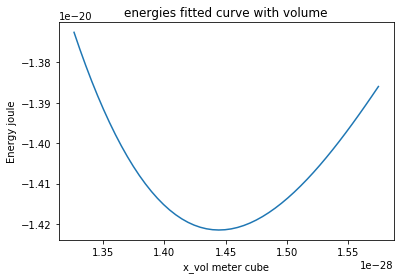

In [60]:
z= np.polyfit(volume, energies, 3)

p = np.poly1d(z)  # p is polynomial
print("polynomial \n",   p)

plt.plot(volume,p(volume))


plt.xlabel('x_vol meter cube')
plt.title('energies fitted curve with volume')
plt.ylabel('Energy joule')
plt.show()

pressure at in general  
             2
1.694e+65 x - 5.463e+37 x + 4.355e+09 

lattice vector in angstrome              presure at giga pascal
5.1000                         |          0.09062
5.1061                         |          0.08603
5.1122                         |          0.08151
5.1184                         |          0.07706
5.1245                         |          0.07267
5.1306                         |          0.06835
5.1367                         |          0.06411
5.1429                         |          0.05993
5.1490                         |          0.05582
5.1551                         |          0.05178
5.1612                         |          0.04782
5.1673                         |          0.04392
5.1735                         |          0.04010
5.1796                         |          0.03635
5.1857                         |          0.03267
5.1918                         |          0.02907
5.1980                         |          0.02555
5.2041

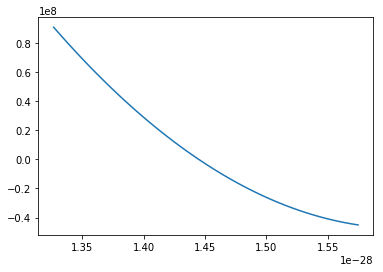

In [61]:
pressure = []

derivative = -np.polyder(p)


print("pressure at in general  \n ", derivative,'\n')
# print(deriv)


for i in volume:
    pressure.append(derivative(i))

    
pressure = np.array(pressure)

print("lattice vector in angstrome      ", "       presure at giga pascal")

for i in range(50):
    print("%.4f                         |          %.5f"%(lattice_vector[i]*(10**(10)), pressure[i]* 1e-09))
    
plt.plot(volume,derivative(volume))



In [62]:
min_index = np.argmin(energies)
relaxed_vol = volume[min_index]
a = np.polyder(p)
a_a = np.polyder(a)
bulk_bulk = a_a(relaxed_vol)

bulk_modulus = relaxed_vol * bulk_bulk
print("bulk_modulus  ", bulk_modulus * 1e-9)

bulk_modulus   0.8194833645075855


# Q2) Grade: 15.0 / 25.0

In [63]:
# read the structure
atoms = ase.io.read('perturbed_supercell_PbTiO3_POSCAR', format='vasp')

ase.visualize.view(atoms)

scaled_positions = atoms.get_scaled_positions()
positions = atoms.get_positions()
symbols = atoms.get_chemical_symbols()

index_pb = []
for i in range(len(symbols)):
    if symbols[i] != 'Ti':
        index_pb.append(i)
        
print(index_pb)
        
index = np.random.randint(0,len(index_pb))
desired_pb_index = index_pb[index]  # random pb index 
print(desired_pb_index)

print(positions[desired_pb_index])

neighbour_dist = 1e+6
neighbour_index = -1

for i in range(len(symbols)):
    if symbols[i]!= "Ti":
        continue

    dist = np.sum((np.array(positions[i])) - np.array(positions[desired_pb_index])**2)

    dist = np.sqrt(dist)

    if dist < neighbour_dist:
        neighbour_dist = dist
        neighbour_index = i

symbols[desired_pb_index] = 'Ti'
symbols[neighbour_index] = 'Pb'

atoms.set_chemical_symbols(symbols)

ase.visualize.view(atoms)
    
'''
..............
write your code here
'atoms' (atomic-object) will be modified here
..............
'''
    
# save the structure
# write the final atomic structure 'atoms' to file
ase.io.write('antisite_defect_POSCAR', atoms, format='vasp')

[0, 1, 2, 3, 5, 6, 7, 8, 10, 11, 12, 13, 15, 16, 17, 18, 20, 21, 22, 23, 25, 26, 27, 28, 30, 31, 32, 33, 35, 36, 37, 38, 40, 41, 42, 43, 45, 46, 47, 48, 50, 51, 52, 53, 55, 56, 57, 58, 60, 61, 62, 63, 65, 66, 67, 68, 70, 71, 72, 73, 75, 76, 77, 78, 80, 81, 82, 83, 85, 86, 87, 88, 90, 91, 92, 93, 95, 96, 97, 98, 100, 101, 102, 103, 105, 106, 107, 108, 110, 111, 112, 113, 115, 116, 117, 118, 120, 121, 122, 123, 125, 126, 127, 128, 130, 131, 132, 133, 135, 136, 137, 138, 140, 141, 142, 143, 145, 146, 147, 148, 150, 151, 152, 153, 155, 156, 157, 158, 160, 161, 162, 163, 165, 166, 167, 168, 170, 171, 172, 173, 175, 176, 177, 178, 180, 181, 182, 183, 185, 186, 187, 188, 190, 191, 192, 193, 195, 196, 197, 198, 200, 201, 202, 203, 205, 206, 207, 208, 210, 211, 212, 213, 215, 216, 217, 218, 220, 221, 222, 223, 225, 226, 227, 228, 230, 231, 232, 233, 235, 236, 237, 238, 240, 241, 242, 243, 245, 246, 247, 248, 250, 251, 252, 253, 255, 256, 257, 258, 260, 261, 262, 263, 265, 266, 267, 268, 270, 27

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:32: RuntimeWarning: invalid value encountered in sqrt


## Q3) Grade: 30.0 / 30.0

In [4]:
atoms = ase.build.bulk('Cu', 'fcc', a=3.8, cubic=True)
# ase.visualize.view(atoms)

In [5]:
from ase.build import surface,sort
atoms = surface(atoms, (1, 1, 1), 4, vacuum=15.0)
# ase.visualize.view(atoms)

In [6]:
 atoms *= (2, 2, 1)
#  ase.visualize.view(atoms)

In [7]:
 atoms1 = sort(atoms, tags=atoms.positions[:, 2]) # sort according to z position

In [8]:
# ase.visualize.view(atoms1)

In [9]:
from ase.constraints import FixAtoms

atoms_index = []
for i in range(32):
    atoms_index.append(i)

cons = FixAtoms(indices = atoms_index)
atoms1.set_constraint(cons)

ase.visualize.view(atoms1)

In [78]:
ase.io.write('surface_POSCAR', atoms1, format='vasp')

In [79]:
atoms3 = ase.io.read('reference_surface_POSCAR', format='vasp')
ase.visualize.view(atoms3)